<a href="https://colab.research.google.com/github/vmllz8/Miskhub/blob/main/ml_miskhub(day1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [726]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, silhouette_score, davies_bouldin_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN


Load data

In [727]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)


read data


In [728]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [729]:
print(df.shape)

(150, 4)


In [730]:
print(df.tail())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8


again load data and read data

In [731]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df1 = pd.read_csv(url, names=names)

In [732]:
df1.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [733]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Explor the data

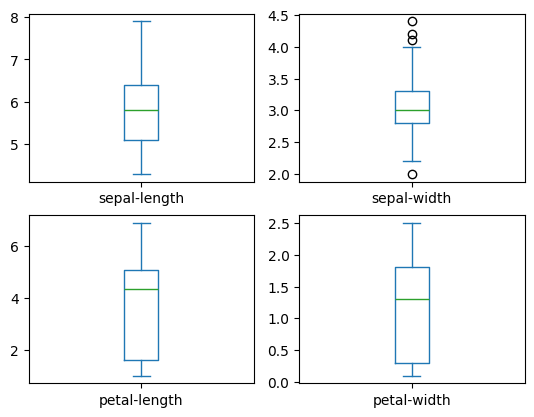

In [734]:
df1.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [735]:
print(df1.shape)

(150, 5)


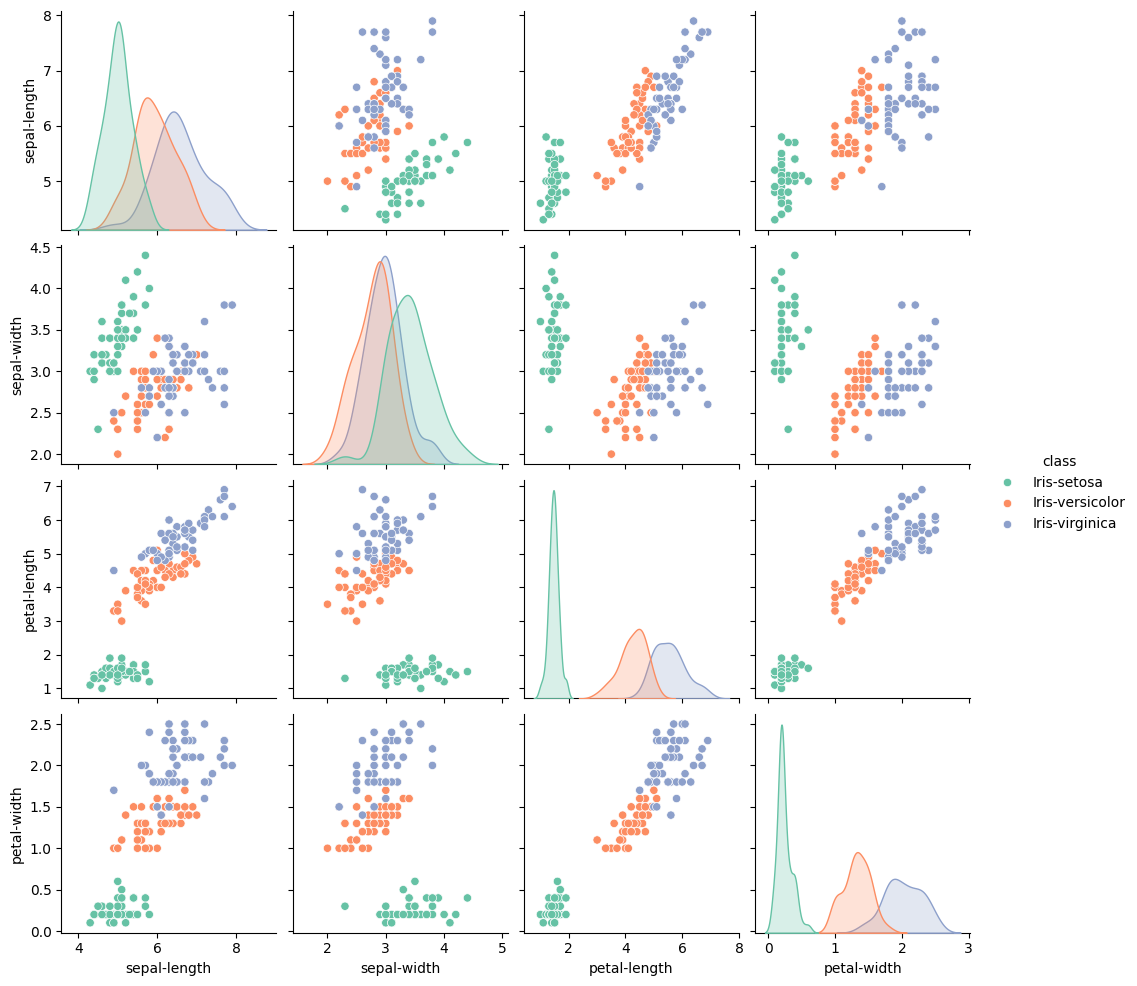

In [736]:
sns.pairplot(data=df1,hue="class",palette="Set2")
plt.show()

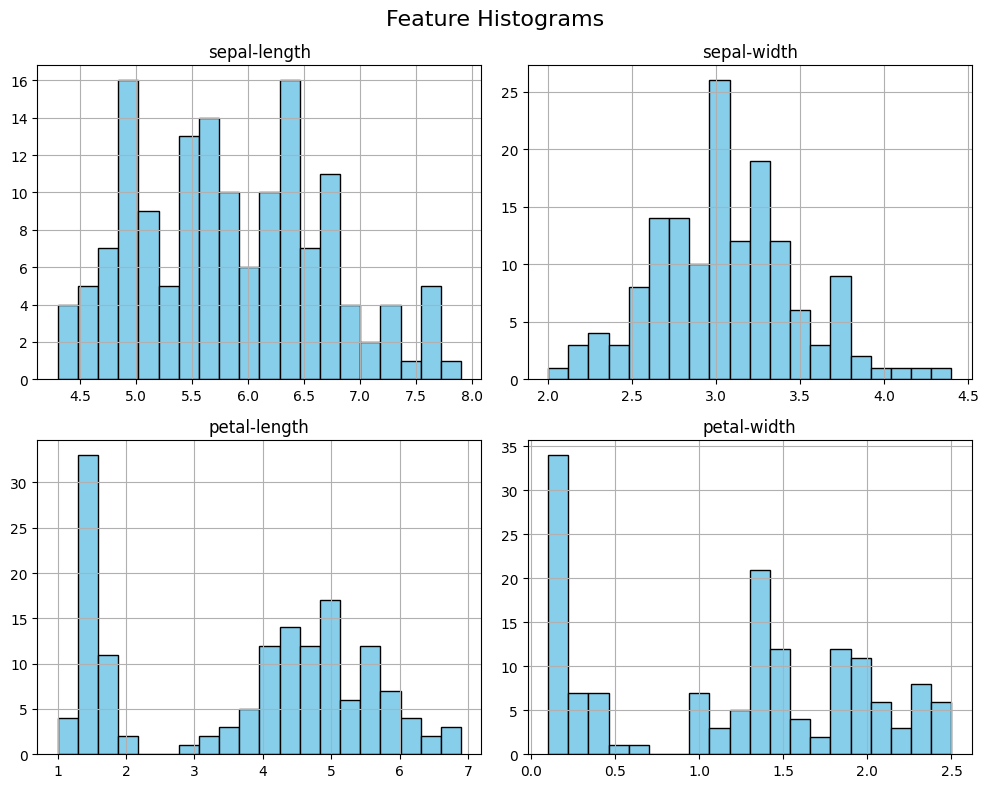

In [737]:
df1.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Histograms", fontsize=16)
plt.tight_layout()
plt.show()

In [738]:
print(df1.describe())


       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [739]:
print(df1.isnull().sum()) #miss value

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64


remove outliers

In [740]:
#column = 'sepal-width'

In [741]:
#Q1 = df1[column].quantile(0.25)
#Q3 = df1[column].quantile(0.75)
#IQR = Q3 - Q1


In [742]:
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

In [743]:
#df2 = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]

In [744]:
"""plt.subplot(1, 2, 1)
sns.boxplot(y=df1[column])
plt.title("Before Cleaning")
plt.subplot(1, 2, 2)
sns.boxplot(y=df2[column])
plt.title("After Cleaning")
plt.tight_layout()
plt.show()"""

'plt.subplot(1, 2, 1)\nsns.boxplot(y=df1[column])\nplt.title("Before Cleaning")\nplt.subplot(1, 2, 2)\nsns.boxplot(y=df2[column])\nplt.title("After Cleaning")\nplt.tight_layout()\nplt.show()'

In [745]:
df1.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [746]:
df2 = pd.crosstab(index=df1["class"], columns="count")
print(df1)


     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [747]:
df2.head()

col_0,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Unsupervised Learning: Clustering

In [748]:
x = df1[["sepal-width", "sepal-length", "petal-length", "petal-width"]].values

In [749]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

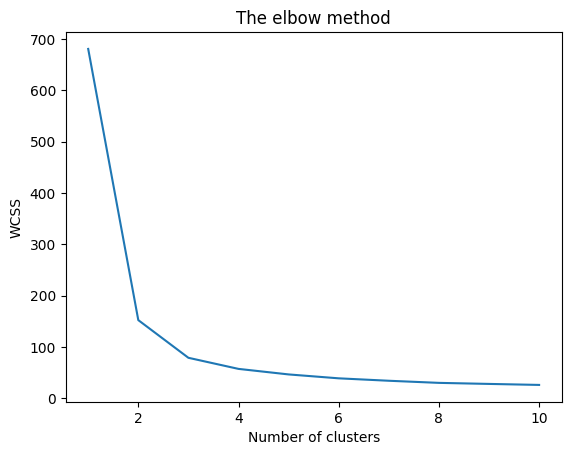

In [750]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [751]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

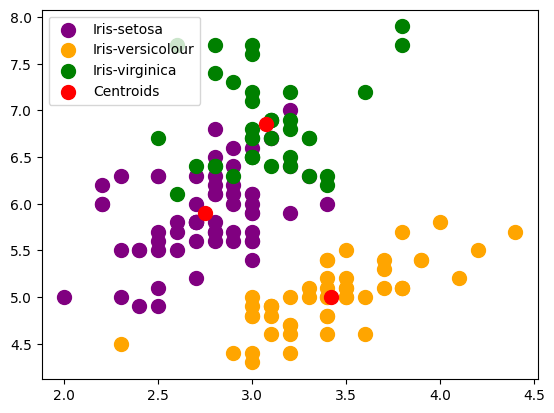

In [752]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

check

In [753]:
features = df1[["sepal-width", "sepal-length", "petal-length", "petal-width"]]
target = df1["class"]



In [754]:
kmeans = KMeans(n_clusters=99)

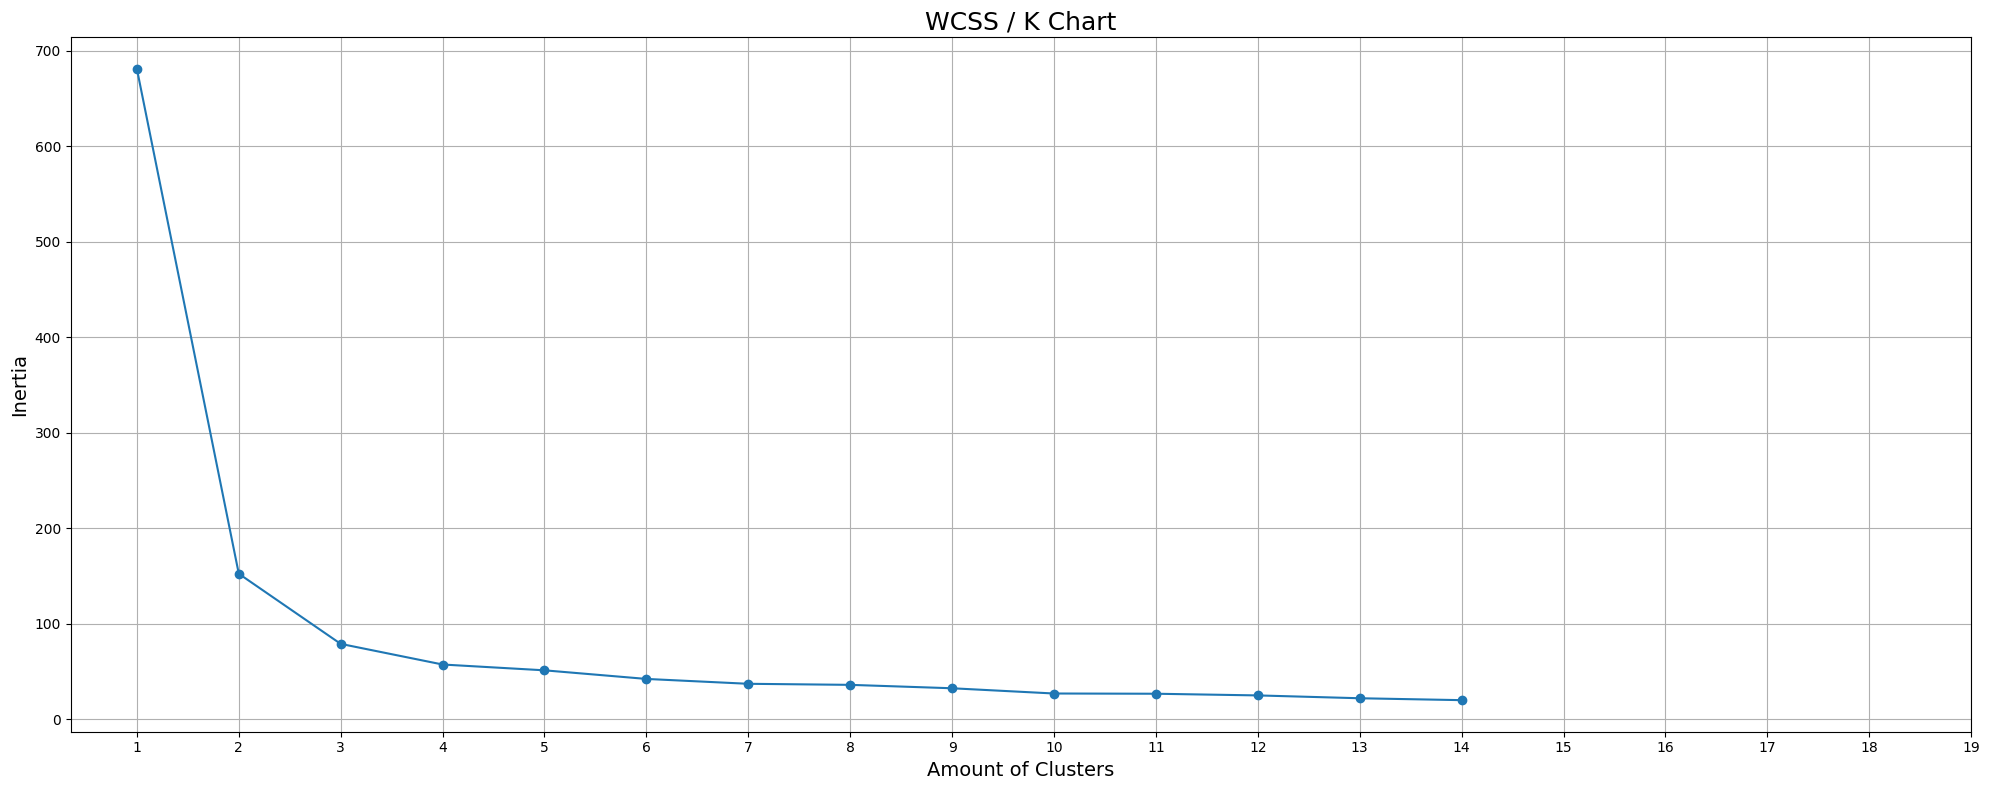

In [755]:
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

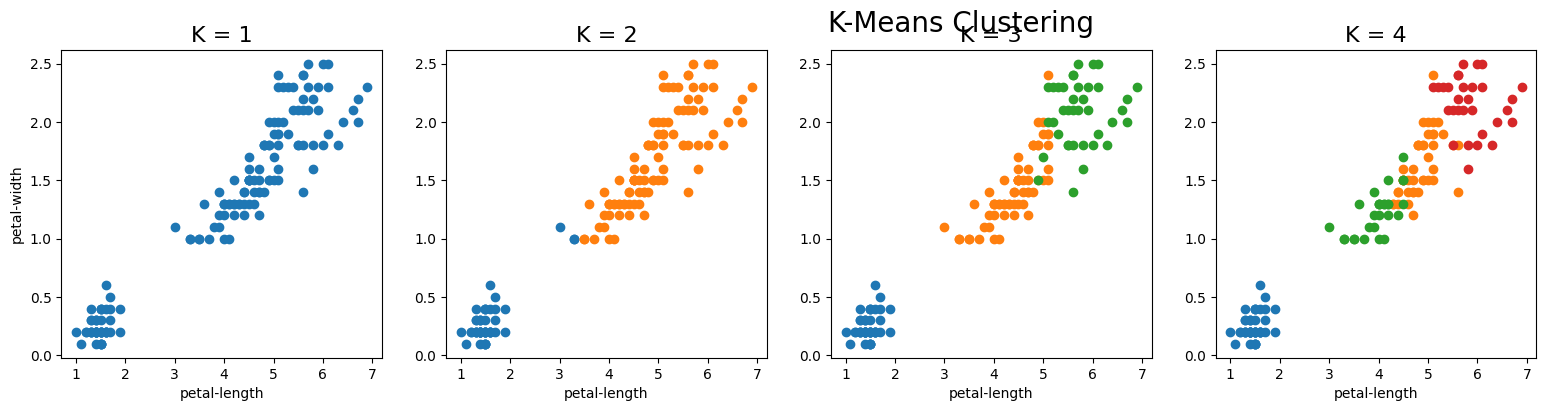

In [756]:
plt.figure(figsize=(24, 4))
plt.suptitle("K-Means Clustering", fontsize=20)

# 🔹 K = 1
plt.subplot(1, 5, 1)
plt.title("K = 1", fontsize=16)
plt.xlabel("petal-length")
plt.ylabel("petal-width")
plt.scatter(features["petal-length"], features["petal-width"])

# 🔹 K = 2
plt.subplot(1, 5, 2)
plt.title("K = 2", fontsize=16)
plt.xlabel("petal-length")
kmeans = KMeans(n_clusters=2, n_init=10)
features["labels"] = kmeans.fit_predict(features)
for label in features["labels"].unique():
    plt.scatter(features["petal-length"][features.labels == label],
                features["petal-width"][features.labels == label])
features.drop("labels", axis=1, inplace=True)

# 🔹 K = 3
plt.subplot(1, 5, 3)
plt.title("K = 3", fontsize=16)
plt.xlabel("petal-length")
kmeans = KMeans(n_clusters=3, n_init=10)
features["labels"] = kmeans.fit_predict(features)
for label in features["labels"].unique():
    plt.scatter(features["petal-length"][features.labels == label],
                features["petal-width"][features.labels == label])
features.drop("labels", axis=1, inplace=True)

# 🔹 K = 4
plt.subplot(1, 5, 4)
plt.title("K = 4", fontsize=16)
plt.xlabel("petal-length")
kmeans = KMeans(n_clusters=4, n_init=10)
features["labels"] = kmeans.fit_predict(features)
for label in features["labels"].unique():
    plt.scatter(features["petal-length"][features.labels == label],
                features["petal-width"][features.labels == label])
features.drop("labels", axis=1, inplace=True)



Isolation Forest Outlier Detection

In [757]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [758]:
features = df1[["sepal-length", "sepal-width", "petal-length", "petal-width"]]




In [759]:
#scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [760]:
iforest = IsolationForest(n_estimators=100, max_samples='auto',
                          contamination=0.05, max_features=1.0,
                          bootstrap=False, n_jobs=-1, random_state=1)


In [761]:
outlier_preds = iforest.fit_predict(features_scaled)

#  (-1: outliers) , (1: normal / 0: outliers)
df1["outlier"] = (outlier_preds == -1).astype(int)

In [762]:
print("numbers of outliers  :", df1["outlier"].sum())

numbers of outliers  : 8


In [763]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

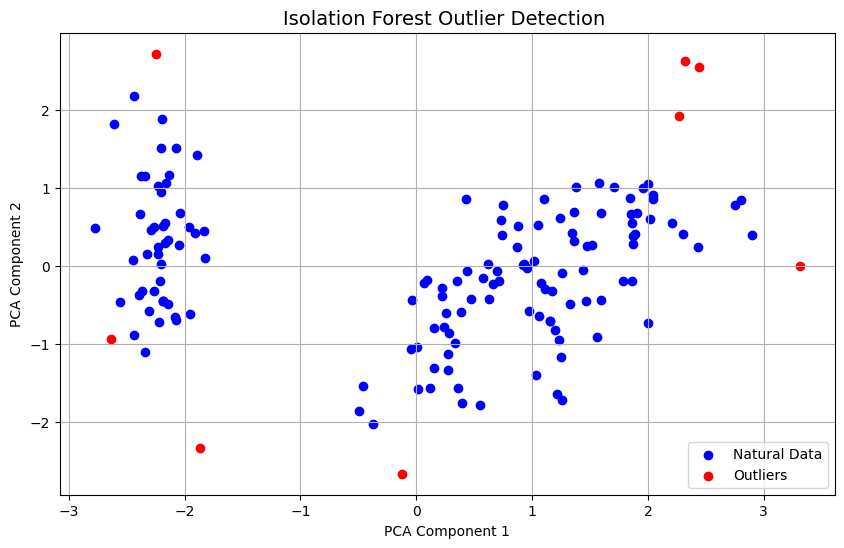

In [764]:
plt.figure(figsize=(10,6))
plt.scatter(
    features_pca[df1["outlier"] == 0, 0], features_pca[df1["outlier"] == 0, 1],
    c='blue', label='Natural Data'
)
plt.scatter(
    features_pca[df1["outlier"] == 1, 0], features_pca[df1["outlier"] == 1, 1],
    c='red', label='Outliers'
)
plt.title("Isolation Forest Outlier Detection ", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

Modeling with scikit-learn¶


In [765]:
df1.head()

,sepal-length,sepal-width,petal-length,petal-width,class,outlier
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [766]:
df3 = df1.copy()


In [767]:
df3.head()

,sepal-length,sepal-width,petal-length,petal-width,class,outlier
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [768]:
a = df3.drop(['class','outlier'], axis=1)
b = df3['class']

In [769]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)


In [770]:
scaler = StandardScaler()
a_train_scaled = scaler.fit_transform(a_train)
a_test_scaled = scaler.transform(a_test)


In [771]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(a_train_scaled, b_train)

DecisionTreeClassifier(random_state=42)

In [772]:
b_pred = clf.predict(a_test_scaled)


In [773]:
for i in range(5):
    a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=i)
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(a_train, b_train)
    acc = clf.score(a_test, b_test)
    accuracies.append(acc)
mean_acc = sum(accuracies) / len(accuracies)
print(f"\nMean Accuracy: {mean_acc}")


Mean Accuracy: 0.9700000000000001


Partitioning

In [774]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=42)


In [775]:
scaler = StandardScaler()
a_train_scaled = scaler.fit_transform(a_train)
a_test_scaled = scaler.transform(a_test)
a_scaled = scaler.fit_transform(a)


In [776]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

In [777]:
for name, model in models.items():
    accuracies = []
    for i in range(5):
        a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=i)

        scaler = StandardScaler()
        a_train_scaled = scaler.fit_transform(a_train)
        a_test_scaled = scaler.transform(a_test)

        model.fit(a_train_scaled, b_train)
        b_pred = model.predict(a_test_scaled)
        acc = accuracy_score(b_test, b_pred)
        accuracies.append(acc)

    mean_acc = np.mean(accuracies)
    print(f"{name}: Mean Accuracy  = {mean_acc:.4f}")

Logistic Regression: Mean Accuracy  = 0.9733
Decision Tree: Mean Accuracy  = 0.9467
Random Forest: Mean Accuracy  = 0.9800
Gradient Boosting: Mean Accuracy  = 0.9733
KNN: Mean Accuracy  = 0.9600
SVM: Mean Accuracy  = 0.9733


In [780]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(a_scaled, b)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.9666666666666668


Cross-Validation

In [781]:
X = df1.drop(['class', 'outlier'], axis=1)
y = df1['class']
print(X.shape, y.shape)


(150, 4) (150,)


In [782]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [783]:


print("Cross-Validation Results")
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    acc_cv_mean = scores.mean()
    acc_cv_std = scores.std()
    print(f"{name}: CV Mean Accuracy = {acc_cv_mean:.4f} | Std = {acc_cv_std:.4f}")

Cross-Validation Results
Logistic Regression: CV Mean Accuracy = 0.9600 | Std = 0.0389
Decision Tree: CV Mean Accuracy = 0.9600 | Std = 0.0327
Random Forest: CV Mean Accuracy = 0.9467 | Std = 0.0452
Gradient Boosting: CV Mean Accuracy = 0.9600 | Std = 0.0249
KNN: CV Mean Accuracy = 0.9600 | Std = 0.0249
SVM: CV Mean Accuracy = 0.9667 | Std = 0.0211


GridSearchCV

In [784]:
model = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [785]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_scaled, y)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [786]:
print(f" Best Accuracy: {grid.best_score_:.4f}")
print(f" Best Parameters: {grid.best_params_}")


 Best Accuracy: 0.9733
 Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
